In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("iris.csv")
df.head()

,id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.isnull().sum()

id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df=df.drop(['id'],axis=1)

In [9]:
df.skew()

SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

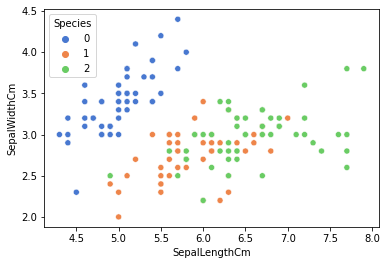

In [32]:
sns.scatterplot(x = "SepalLengthCm", y = "SepalWidthCm", hue = "Species", data =df,palette="muted")

In [10]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
from sklearn.preprocessing import LabelEncoder
df['Species']=LabelEncoder().fit_transform(df['Species'])

In [12]:
df.Species.unique()

array([0, 1, 2])

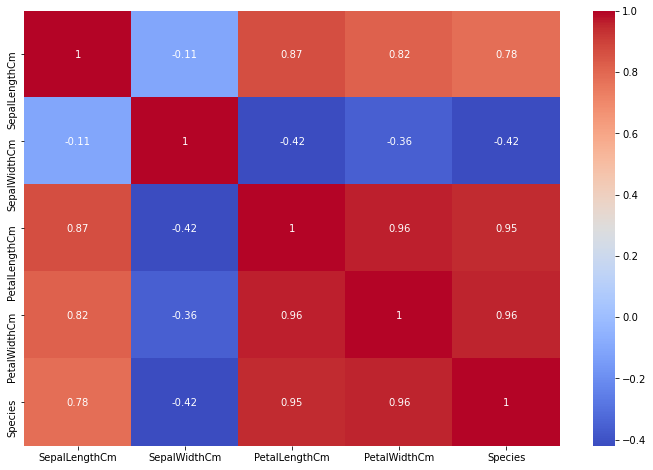

In [13]:
cor=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

In [14]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae,median_absolute_error as mee,classification_report as cr,accuracy_score as ac

In [15]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [16]:
x=df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y=df[['Species']]

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=40)

In [18]:
clf = linear_model.LogisticRegression()

In [19]:
clf.fit(x_train,y_train)

LogisticRegression()

In [20]:
y_pre = clf.predict(x_test)
y_pre

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0])

In [21]:
from sklearn.model_selection import cross_val_score
print(ac(y_test,y_pre)*100)
sco=(cross_val_score(clf,x,y,cv=5))
print(np.mean(sco)*100)

100.0
97.33333333333334


In [34]:
newinput=[[5.1,3.5,1.4,0.2]]
output=clf.predict(newinput)
output

array([0])

In [36]:
import pickle
pickle.dump(clf,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))